In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('liver_disease_.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes


In [4]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [5]:
df.Albumin_and_Globulin_Ratio.fillna(df['Albumin_and_Globulin_Ratio'].mean(), inplace=True )

Diagnosed with liver disease:  416
Not diagnosed with liver disease:  167


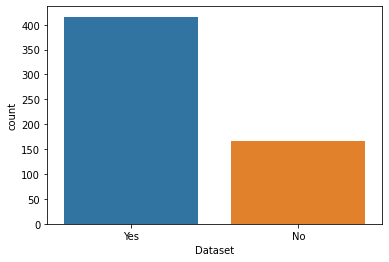

In [6]:
sns.countplot(data = df, x = 'Dataset', label='Count')
liverDisease_yes, liverDisease_no = df['Dataset'].value_counts()
print('Diagnosed with liver disease: ',liverDisease_yes)
print('Not diagnosed with liver disease: ',liverDisease_no)

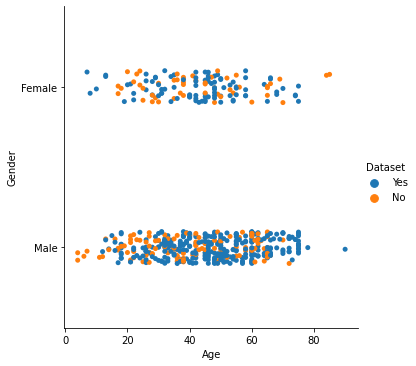

In [7]:
sns.catplot(x="Age", y="Gender", hue="Dataset", data=df)

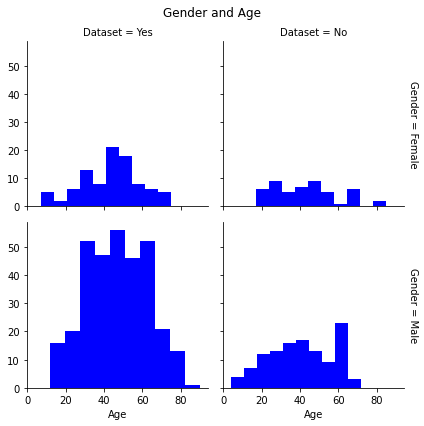

In [8]:
g = sns.FacetGrid(df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="blue")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Gender and Age');


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    object 
dtypes: float64(5), int64(4), object(2)
memory usage: 50.2+ KB


In [10]:
label_encoder = LabelEncoder()
label_encoder.fit(df.Gender.unique())
df['Gender_Encoded'] = label_encoder.transform(df.Gender)
label_encoder.fit(df.Dataset.unique())
df['Dataset_Encoded'] = label_encoder.transform(df.Dataset)

In [16]:
X = df.drop(['Gender'], axis=1)
X.drop(['Dataset', 'Dataset_Encoded'], axis = 1, inplace = True)
y = df['Dataset_Encoded']

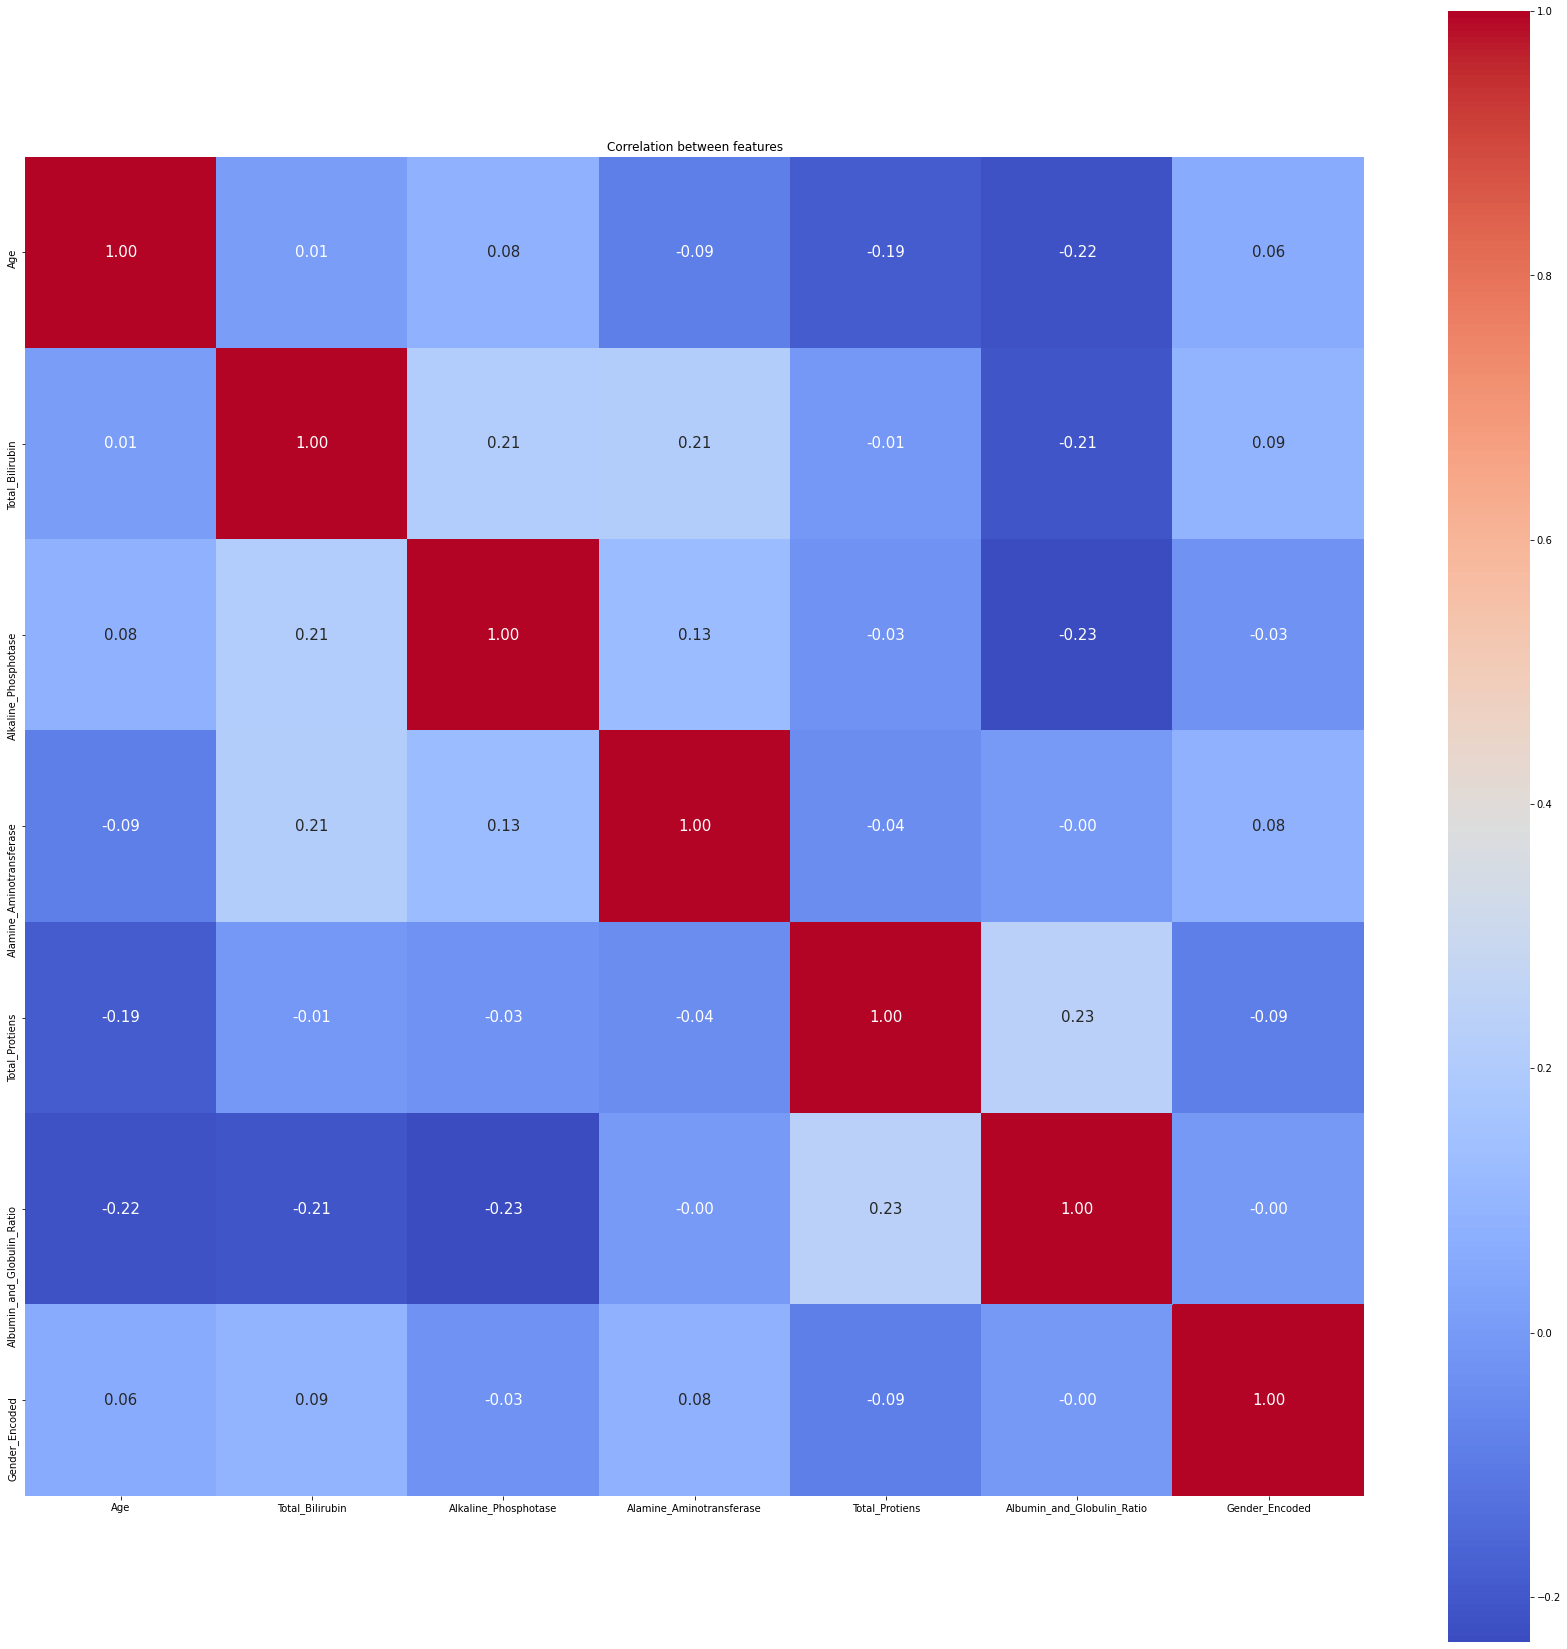

In [15]:
liverDisease_corr = X.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(liverDisease_corr, cbar=True, square=True, annot= True, fmt= '.2f',annot_kws={'size': 15}, cmap='coolwarm')
plt.title('Correlation between features');

In [17]:
X.drop(['Direct_Bilirubin', 'Aspartate_Aminotransferase', 'Albumin'], axis = 1, inplace = True)
X.head()

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin_and_Globulin_Ratio,Gender_Encoded
0,65,0.7,187,16,6.8,0.90,0
1,62,10.9,699,64,7.5,0.74,1
2,62,7.3,490,60,7.0,0.89,1
3,58,1.0,182,14,6.8,1.00,1
4,72,3.9,195,27,7.3,0.40,1


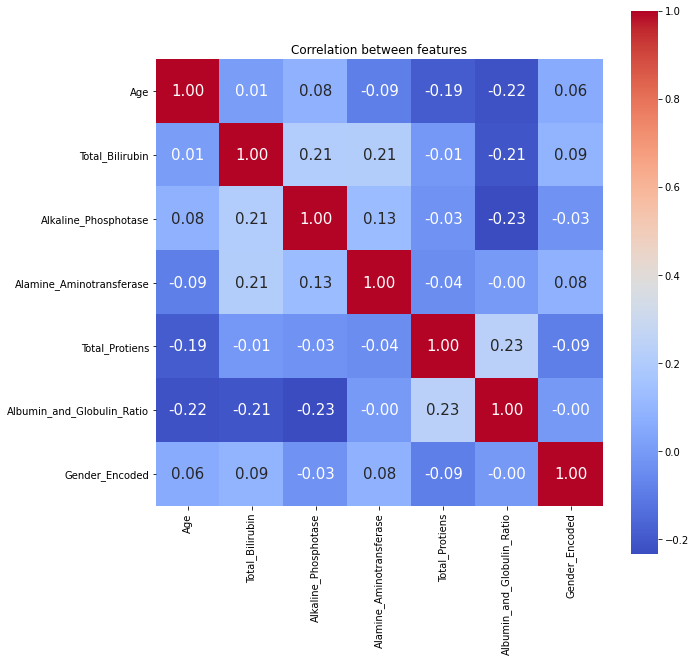

In [18]:
liverDisease_corr = X.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(liverDisease_corr, cbar=True, square=True, annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap='coolwarm')
plt.title('Correlation between features');

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [20]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_predicted = logreg.predict(X_test)
y_predicted_proba = logreg.predict_proba(X_test)[:, 1]
print('Coefficient: \n', logreg.coef_)
print('Intercept: ', logreg.intercept_)
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_predicted) * 100))
print('AUC: {:.2f}%'.format(roc_auc_score(y_test, y_predicted_proba) * 100))
print('Classification report: \n\n', classification_report(y_test, y_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_predicted))
print('\nTraining set score: {:.2f}%'.format(logreg.score(X_train, y_train) * 100))
print('Testing set score: {:.2f}%'.format(logreg.score(X_test, y_test) * 100))

Coefficient: 
 [[ 0.02305046  0.15728169  0.00139516  0.01334675  0.1599186  -0.66912391
   0.05881307]]
Intercept:  [-1.7948936]
Accuracy: 73.14%
AUC: 77.18%
Classification report: 

               precision    recall  f1-score   support

           0       0.59      0.20      0.30        50
           1       0.75      0.94      0.83       125

    accuracy                           0.73       175
   macro avg       0.67      0.57      0.57       175
weighted avg       0.70      0.73      0.68       175

Confusion Matrix: 
 [[ 10  40]
 [  7 118]]

Training set score: 73.77%
Testing set score: 73.14%


In [21]:
logreg = LogisticRegression(
    C=15,
    multi_class='ovr',
    penalty='l2',
    solver='lbfgs',
    random_state=42
)
logreg.fit(X_train, y_train)

y_predicted = logreg.predict(X_test)
y_predicted_proba = logreg.predict_proba(X_test)[:, 1]
print('Coefficient: \n', logreg.coef_)
print('Intercept: ', logreg.intercept_)
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_predicted) * 100))
print('AUC: {:.2f}%'.format(roc_auc_score(y_test, y_predicted_proba) * 100))
print('Classification report: \n\n', classification_report(y_test, y_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_predicted))
print('\nTraining set score: {:.2f}%'.format(logreg.score(X_train, y_train) * 100))
print('Testing set score: {:.2f}%'.format(logreg.score(X_test, y_test) * 100))

Coefficient: 
 [[ 2.23749975e-02  1.66794014e-01  9.05456928e-04  1.40609123e-02
   7.91395785e-02 -9.54480947e-01  1.33009149e-01]]
Intercept:  [-0.9281629]
Accuracy: 73.14%
AUC: 77.28%
Classification report: 

               precision    recall  f1-score   support

           0       0.57      0.24      0.34        50
           1       0.75      0.93      0.83       125

    accuracy                           0.73       175
   macro avg       0.66      0.58      0.58       175
weighted avg       0.70      0.73      0.69       175

Confusion Matrix: 
 [[ 12  38]
 [  9 116]]

Training set score: 73.04%
Testing set score: 73.14%


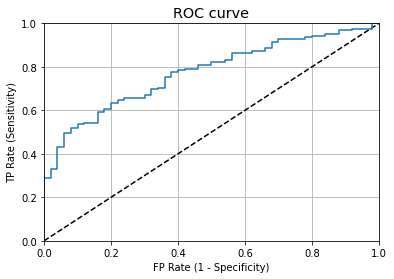

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('FP Rate (1 - Specificity)')
plt.ylabel('TP Rate (Sensitivity)')
plt.grid(True)